# Natural Language Processing

## Libraries and settings

In [1]:
# Required
!pip install nltk
!pip install wordcloud

# Libraries
import os
import re
import numpy as np
import pandas as pd
import random
import string

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Set seed
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Current working directory
print('Current working directory:', os.getcwd())

Current working directory: C:\Workspacezhaw\data_analytics\Projekt_DA


## Import 


In [3]:
# Import original data
data_orig = pd.read_csv("chatbot_sessions.csv", sep=';')

# Subset of the data
sub_01 = data_orig.loc[data_orig['who_says'] == 'assistant']
sub_02 = data_orig.loc[data_orig['who_says'] == 'user']

# Concatenating the subsets to one data frame
data = pd.concat([sub_01, sub_02]).reset_index(drop=True)
print('Number of reviews in data: {}'.format(len(data)))

data

Number of reviews in data: 103


,id,type,user,t,who_says,says_what,is_deleted
0,2,001t,001u,2023-06-22 14:16:18,assistant,Hello! How are you doing today? How can I assi...,0
1,4,002t,002u,2023-06-22 14:16:19,assistant,Hello! How are you doing today?,0
2,6,003t,003u,2023-06-22 14:16:20,assistant,"Hello! How can I assist you today, and what su...",0
3,8,004t,004u,2023-06-22 14:16:22,assistant,Hello! How are you today? How can I assist you?,0
4,10,005t,005u,2023-06-22 14:16:23,assistant,Hello there! How are you doing today?,0
...,...,...,...,...,...,...,...
98,104,009t,009u,2023-06-22 14:58:45,user,My friends don't know sign language,0
99,106,008t,008u,2023-06-22 15:01:20,user,But what about actual communication face to fa...,0
100,108,008t,008u,2023-06-22 15:04:24,user,Yes please.,0
101,110,008t,008u,2023-06-22 15:04:42,user,"My location is Munich, Germany.",0


## Check missing values

In [4]:
data.isna().sum()

id            0
type          0
user          0
t             0
who_says      0
says_what     0
is_deleted    0
dtype: int64

## Number of who says text per sentiment class in 'data'

In [5]:
df_class = data['who_says'].value_counts()
df_class

assistant    57
user         46
Name: who_says, dtype: int64

## Wordcloud with most frequently used words

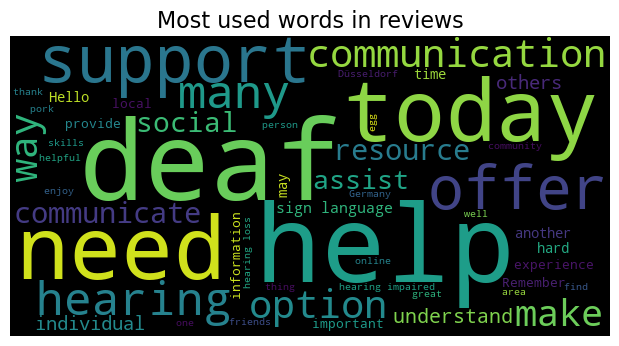

In [6]:
# Wordcloud function
def wordCloud_generator(data, title=None):
    
    wordcloud = WordCloud(height=300,
                          width=600,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    
    # Plot the WordCloud image                        
    plt.figure(figsize = (6, 4), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=16)
    plt.show()
    
# Create Wordcloud
wordCloud_generator(data['says_what'], title="Most used words in reviews")

## Define X and y data

In [7]:
X = data['says_what'].copy()
y = data['who_says'].copy()

print('Messages')
print(X)

print('\nSentiments:')
print(y)

Messages
0      Hello! How are you doing today? How can I assi...
1                        Hello! How are you doing today?
2      Hello! How can I assist you today, and what su...
3        Hello! How are you today? How can I assist you?
4                  Hello there! How are you doing today?
                             ...                        
98                   My friends don't know sign language
99     But what about actual communication face to fa...
100                                          Yes please.
101                      My location is Munich, Germany.
102                                       okay thank you
Name: says_what, Length: 103, dtype: object

Sentiments:
0      assistant
1      assistant
2      assistant
3      assistant
4      assistant
         ...    
98          user
99          user
100         user
101         user
102         user
Name: who_says, Length: 103, dtype: object


Messages:
0      Hello! How are you doing today? How can I assi...
1                        Hello! How are you doing today?
2      Hello! How can I assist you today, and what su...
3        Hello! How are you today? How can I assist you?
4                  Hello there! How are you doing today?
                             ...                        
98                   My friends don't know sign language
99     But what about actual communication face to fa...
100                                          Yes please.
101                      My location is Munich, Germany.
102                                       okay thank you
Name: says_what, Length: 103, dtype: object

Sentiments:
0      assistant
1      assistant
2      assistant
3      assistant
4      assistant
         ...    
98          user
99          user
100         user
101         user
102         user
Name: who_says, Length: 103, dtype: object


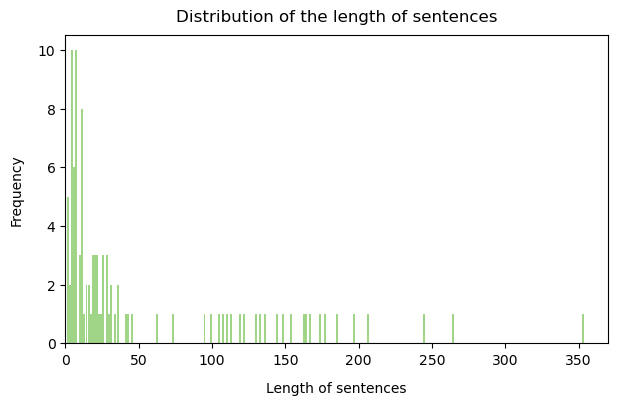

In [17]:
import matplotlib.pyplot as plt

X = data['says_what'].copy()

print('Messages:')
print(X)

print('\nSentiments:')
print(y)

# Calculate length
length_dist = [len(x.split(" ")) for x in X]

# Plot Histogram
fig = plt.figure(figsize=(7, 4))
n, bins, patches = plt.hist(x=length_dist,
                            bins=250,
                            color='#42AD12',
                            alpha=0.5,
                            rwidth=0.95)

plt.ticklabel_format(style='plain')

# Set x limits
plt.xlim(0, 370)

# Set labels
plt.xlabel('Length of sentences', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Distribution of the length of sentences', fontsize=12, pad=10)

plt.show()


## Distribution of sentence length

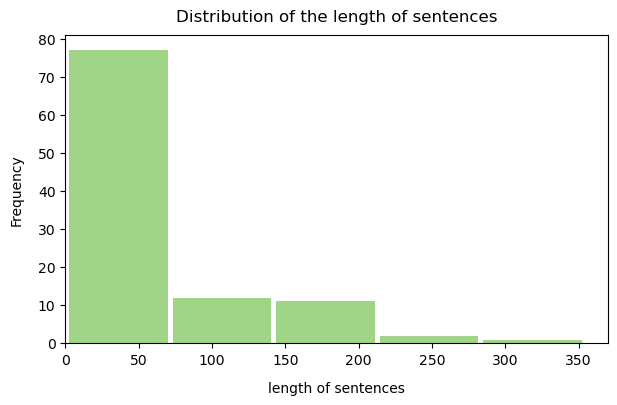

In [10]:
# Calculate length
length_dist = [len(x.split(" ")) for x in X]

# Plot Histogram
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=length_dist, 
                            bins=5, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.ticklabel_format(style='plain')

# Set x limits
plt.xlim(0, 370)

# Set labels
plt.xlabel('length of sentences', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Distribution of the length of sentences', fontsize=12, pad=10)

plt.show()

## Text preprocessing
### Steps:
- Removing punctuations
- Text to lowercase
- Tokenization
- Removing stopwords
- Stemming/Lemmatization

### Removing punctuations

In [ ]:
# Defining the function to remove punctuations
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

# Storing the puntuation free text
X_cleaned_01 = X.apply(lambda x:remove_punctuation(x))
X_cleaned_01

### Text to lowercase

In [ ]:
X_cleaned_02 = X_cleaned_01.apply(lambda x: x.lower())
X_cleaned_02

### Tokenization

In [ ]:
# Function for tokenization
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens

# Applying function
X_cleaned_03 = X_cleaned_02.apply(lambda x: tokenization(x))
X_cleaned_03

### Removing stopwords

In [ ]:
# Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

# Print stopwords
print('English stopwords:')
print(stopwords)

# Defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output = [i for i in text if i not in stopwords]
    return output

# Applying the function
X_cleaned_04 = X_cleaned_03.apply(lambda x:remove_stopwords(x))
X_cleaned_04

### Stemming

In [ ]:
# Defining the object for stemming
porter_stemmer = PorterStemmer()

# Defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

# Applying the function (we use X_cleaned_04 here)
X_cleaned_05 = X_cleaned_04.apply(lambda x: stemming(x))
X_cleaned_05

### Lemmatization

In [ ]:
# Defining the object for lemmatization
lemmatizer = WordNetLemmatizer()

# Defining a function for lemmatization
def lemm(text):
    lemm_text = [lemmatizer.lemmatize(word, pos='v') for word in text]
    return lemm_text

# Applying the function (we use X_cleaned_04 here)
X_cleaned_06 = X_cleaned_04.apply(lambda x: lemm(x))
X_cleaned_06

## Document-Term Matrix

In [ ]:
# Define dummy variable
def dummy_fun(doc):
    return doc

count = CountVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)

# Document-Term Matrix (we use 'X_cleaned_06' as the input)
X_cleaned_07 = count.fit_transform(X_cleaned_06).toarray()
print('Document-Term Matrix:')
print(X_cleaned_07)

# Shape
print('\nShape of the Document-Term Matrix')
print(X_cleaned_07.shape)

# Summary statistics
print('\nSummary statistics')
print(f'min: {np.min(X_cleaned_07):.4f}')
print(f'max: {np.max(X_cleaned_07):.4f}')

## Term Frequency - Inverse Document Frequency (TF-IDF) Matrix

In [ ]:
# Define dummy variable
def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)

# TF-IDF Matrix (we use 'X_cleaned_06' as the input)
X_cleaned_08 = tfidf.fit_transform(X_cleaned_06).toarray()
print('TF-IDF Matrix:')
print(X_cleaned_08)

# Shape
print('\nShape of the TF-IDF Matrix')
print(X_cleaned_08.shape)

# Summary statistics
print('\nSummary statistics')
print(f'min: {np.min(X_cleaned_08):.4f}')
print(f'max: {np.max(X_cleaned_08):.4f}')

## Split data into train/test

In [ ]:
# Train/test samples
X_train, X_test, y_train, y_test = train_test_split(X_cleaned_08, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=67)

# Print X_train
print('X_train:')
print(X_train)

# Print y_train
print('\ny_train:')
print(y_train)

## Model Training

In [ ]:
# Initialize the random forest model 
rfc = RandomForestClassifier(max_depth=20,
                             n_estimators=200,
                             min_samples_leaf=15,
                             random_state=42)

# Train the random forest model
rfc = rfc.fit(X_train, y_train)

##  Model Evaluation

### Create model predictions

In [ ]:
# Predict the target variable
y_pred = rfc.predict(X_test)
y_pred

### Measuring the Accuracy

In [ ]:
# Accuracy
print(f'Accuracy: {accuracy_score(y_pred, y_test):.4f}')

### Confusion matrix

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

### Classification Report

In [ ]:
# Classification Report
print(classification_report(y_test, 
                            y_pred))